In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Set plotting parameters for figures
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [15]:
# Import catrace functions and load dataset configuration
from catrace.exp_collection import read_df
from catrace.dataset import load_dataset_config
dsconfig = load_dataset_config('../juvenile_dataset_without14mm_phearg.json')

In [16]:
# Read an example experiment on a single fish
exp_name = '2021-10-01-DpOBEM-JH21_Dp'
dff = read_df(dsconfig.processed_trace_dir, exp_name)
dff

2021-10-01-DpOBEM-JH21_Dp None


plane                   0                                                    \
neuron                  1         2         3         4         5         6   
neuron_id               0         1         2         3         4         5   
odor trial time                                                               
Phe  0     0     0.300726  0.000000  0.226207  0.095615  0.093459  0.232207   
           1     0.370398  0.000000  0.074633  0.076093  0.114848  0.098396   
           2     0.244631  0.000000  0.150998  0.105015  0.142274  0.159448   
           3     0.272655  0.000000  0.174312  0.106177  0.147669  0.164667   
           4     0.213393  0.000000  0.097776  0.083350  0.090288  0.115508   
...                   ...       ...       ...       ...       ...       ...   
GCA  2     156   0.000000  0.679535  0.539513  0.000000  0.345896  0.000000   
           157   0.000000  1.383870  0.564252  0.011987  0.308800  0.000000   
           158   0.000000  2.068572  0.481642  0.000000  0.304874  0.000000   
           159   0.000000  2.181404  0.566981  0.000000  0.355689  0.000000   
           160   0.000000  2.022217  0.661903  0.000000  0.342057  0.000000   

plane                                                    ...         3  \
neuron                  7        10        11        12  ...       451   
neuron_id               6         7         8         9  ...      1737   
odor trial time                                          ...             
Phe  0     0     0.000000  0.129401  0.169564  0.505881  ...  0.114143   
           1     0.000000  0.116361  0.233176  0.421476  ...  0.228222   
           2     0.000000  0.166675  0.176285  0.330841  ...  0.478763   
           3     0.013240  0.199504  0.158797  0.378150  ...  0.300915   
           4     0.000000  0.240753  0.097578  0.463367  ...  0.309941   
...                   ...       ...       ...       ...  ...       ...   
GCA  2     156   0.178013  0.285564  0.412571  0.051163  ...  0.000000   
           157   0.051091  0.455276  0.302502  0.081382  ...  0.016712   
           158   0.104189  0.803680  0.235329  0.006353  ...  0.000000   
           159   0.045588  0.921792  0.056408  0.126727  ...  0.019089   
           160   0.049854  0.784181  0.148429  0.180404  ...  0.000000   

plane                                                                        \
neuron                452       453       454       455       456       457   
neuron_id            1738      1739      1740      1741      1742      1743   
odor trial time                                                               
Phe  0     0     0.203334  0.260442  0.000000  0.123454  0.132980  0.011176   
           1     0.181885  0.248248  0.000000  0.048758  0.141758  0.000000   
           2     0.190579  0.004230  0.000000  0.127729  0.167715  0.080330   
           3     0.100528  0.190527  0.019742  0.181915  0.212914  0.150516   
           4     0.034575  0.221643  0.000000  0.252555  0.271819  0.137411   
...                   ...       ...       ...       ...       ...       ...   
GCA  2     156   0.053351  0.145419  0.282599  0.152365  0.645319  0.045838   
           157   0.088394  0.160135  0.239934  0.134015  0.969953  0.068856   
           158   0.053593  0.259245  0.309314  0.208335  1.286446  0.080678   
           159   0.065887  0.326154  0.250133  0.184035  1.143735  0.032029   
           160   0.043822  0.434667  0.434173  0.411023  0.957373  0.000000   

plane                                          
neuron                458       459       460  
neuron_id            1744      1745      1746  
odor trial time                                
Phe  0     0     0.013584  0.000000  0.174708  
           1     0.083879  0.000000  0.341858  
           2     0.000000  0.025551  0.361657  
           3     0.012946  0.039675  0.324903  
           4     0.034659  0.001704  0.210265  
...                   ...       ...       ...  
GCA  2     156   3.460142  0.054767  

In [17]:
# Select some neurons that are responsive to both odors
cut_time = 2.3 # seconds. The traces showed be shifted to the left by 2.3s, so that the odor onset is approximately 2s
cut_frame = int(cut_time * dsconfig.frame_rate)
total_time = 10
total_frame = int(total_time * dsconfig.frame_rate)
frame_range = (cut_frame, cut_frame + total_frame)

response_frame_range = (15, 25)
odor = 'Arg'
trial_number = 1
edff = dff.xs((odor, trial_number), level=['odor', 'trial']).T.iloc[:, frame_range[0]:frame_range[1]]
mean_response = edff.iloc[:, response_frame_range[0]:response_frame_range[1]].mean(axis=1)
# Get indices in dff where the response is above 0.75 quantile
idx = mean_response[mean_response > mean_response.quantile(0.95)].index
idx = idx.get_level_values('neuron_id').to_numpy()

odor = 'Phe'
trial_number = 0
edff2 = dff.xs((odor, trial_number), level=['odor', 'trial']).T.iloc[:, frame_range[0]:frame_range[1]]
mean_response2 = edff.iloc[:, response_frame_range[0]:response_frame_range[1]].mean(axis=1)
# Get indices in dff where the response is above 0.75 quantile
idx2 = mean_response2[mean_response2 > mean_response2.quantile(0.80)].index
idx2 = idx2.get_level_values('neuron_id').to_numpy()
idx3 = mean_response2[mean_response2 > mean_response2.quantile(0.95)].index
idx3 = idx3.get_level_values('neuron_id').to_numpy()

import numpy as np
np.random.seed(10)
total_num_neurons = 200
# pick 50 neurons from idx
idx_chosen = list(np.random.choice(idx, 1, replace=False))
# pick 150 neurons from idx2
idx2_chosen = list(np.random.choice(idx2, total_num_neurons+5, replace=False))

# Merge chosen idx and idx2
idx12_chosen = list(set(idx_chosen + idx2_chosen))
len12 = len(idx12_chosen)

combined123 = list(set(idx12_chosen + list(idx3)))
len123 = len(combined123)

num_to_remove_from_12 = len123 - len12

# elements that are in 12 but not in 3
idx_to_remove = list(set(combined123) - set(idx12_chosen))
# Randomly choose num_to_remove_from_12 elements from idx_to_remove
idx_to_remove = list(np.random.choice(idx_to_remove, num_to_remove_from_12, replace=False))

# Remove idx_to_remove from combined123
neuron_idxs_chosen = list(set(combined123) - set(idx_to_remove))


len(neuron_idxs_chosen)

205

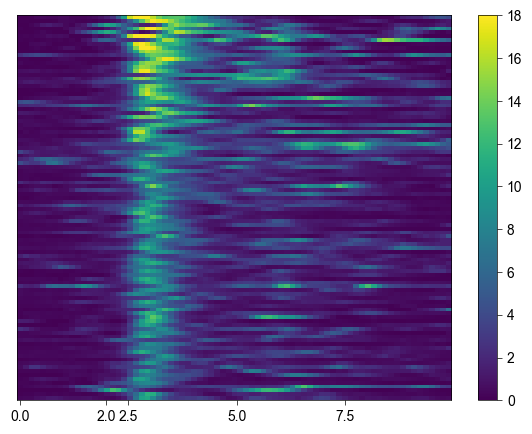

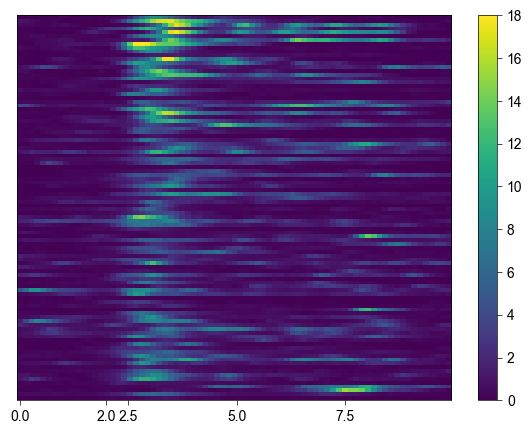

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from catrace.visualize import load_colormap

def plot_example_heatmap(edff, frame_rate, figsize=(7, 5), vmin=0, vmax=1, cmap='viridis', gamma=0.5):
    if cmap == 'clut2b':
        cmap = load_colormap('clut2b', remove_top_white=True)
    fig, ax = plt.subplots(figsize=figsize)
    # Power normalize the heatmap
    from matplotlib.colors import PowerNorm
    if gamma is not None:
        norm = PowerNorm(gamma=gamma, vmin=vmin, vmax=vmax)
        img = ax.matshow(edff, aspect='auto', cmap=cmap, norm=norm)
    else:
        img = ax.matshow(edff, aspect='auto', cmap=cmap)

    # Convert x axis from frame to time
    xticks = np.arange(0, edff.shape[1], 2.5 * frame_rate)
    # append 2*frame_rate to xticks
    xticks = np.append(xticks, 2 * frame_rate)
    ax.set_xticks(xticks)
    xticklabels = xticks / frame_rate
    ax.set_xticklabels(xticklabels)

    # Put the x tick label at the bottom
    ax.xaxis.set_ticks_position('bottom')
    # remove x tick label at the top
    ax.tick_params(axis='x', which='both', bottom=True, top=False)

    # Remove y ticks
    ax.set_yticks([])
    ax.set_yticklabels([])

    colorbar = fig.colorbar(img)
    return fig, ax, img, colorbar

# Save figure
paper_fig_dir = '../../../figures_for_paper/juvenile/example_trace'
import os
os.makedirs(paper_fig_dir, exist_ok=True)
dataset_name = 'juvenile'

from catrace.for_paper import save_figure_for_paper
def plot_and_save_example_heatmap(odor, trial_number,  neuron_idxs, frame_range, sorted_neuron_idxs=None, cut_first=None,cut_last=None,**kwargs):
    edff = dff.xs((odor, trial_number), level=['odor', 'trial']).T.iloc[neuron_idxs, frame_range[0]:frame_range[1]]
    mean_response = edff.iloc[:, 15:38].mean(axis=1)
    if sorted_neuron_idxs is None:
        sorted_neuron_idxs = mean_response.sort_values(ascending=False).index
    if cut_first is not None:
        sorted_neuron_idxs = sorted_neuron_idxs[cut_first:]
    if cut_last is not None:
        sorted_neuron_idxs = sorted_neuron_idxs[:-cut_last]
    edff_sorted = edff.loc[sorted_neuron_idxs]
    fig, ax, img, colorbar = plot_example_heatmap(edff_sorted, dsconfig.frame_rate, figsize=(7, 5), **kwargs)

    #num_neurons = neuron_idxs.stop - neuron_idxs.start
    num_neurons = len(sorted_neuron_idxs)
    fig_name = f'{dataset_name}_example_heatmap_{exp_name}_{odor}_num_neurons{num_neurons}'
    save_figure_for_paper(fig, fig_name, paper_fig_dir)
    return fig, sorted_neuron_idxs

neuron_idxs = slice(0, dff.shape[1])
vmin = 0 * dsconfig.frame_rate
vmax = 18

cut_time = 2.3 # seconds. The traces showed be shifted to the left by 2.3s, so that the odor onset is approximately 2s
cut_frame = int(cut_time * dsconfig.frame_rate)
total_time =10
total_frame = int(total_time * dsconfig.frame_rate)
frame_range = (cut_frame, cut_frame + total_frame)

gamma = 1
fig, sorted_neuron_idxs = plot_and_save_example_heatmap('Arg', 1, neuron_idxs_chosen, frame_range, vmin=vmin, vmax=vmax, cmap='viridis', sorted_neuron_idxs=None, cut_first=0, cut_last=len(neuron_idxs_chosen)-100, gamma=gamma) #total_num_neurons
fig, sorted_neuron_idxs = plot_and_save_example_heatmap('Phe', 0, neuron_idxs_chosen, frame_range, vmin=vmin, vmax=vmax, cmap='viridis', sorted_neuron_idxs=sorted_neuron_idxs, gamma=gamma)
plt.show()

In [21]:
# Plot selected single traces
roi_ids = [269, 318, 321, 351, 382, 405, 427, 429, 437, 443]

In [22]:
plane = 1 # Plane number 2
trial = ('Arg', 0)
plane_dff = dff.T.xs(plane, level='plane')
neurons = plane_dff.index.get_level_values('neuron').isin(roi_ids)
example_dff = plane_dff[neurons].T.xs(trial, level=['odor', 'trial'])
example_dff.max()

neuron  neuron_id
269     646          16.157333
318     695          10.146296
321     698          13.542031
351     727          14.268804
382     758          16.631413
405     780          12.705333
427     802          16.547213
429     804          16.786922
437     812          14.469848
443     818           8.333351
dtype: float64

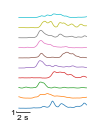

In [ ]:
def plot_example_traces(dff, plane, trial, roi_ids,
                        cut_time=2.3, # seconds
                        total_time=10,
                        **kwargs):
    plane_dff = dff.T.xs(plane, level='plane')
    neurons = plane_dff.index.get_level_values('neuron').isin(roi_ids)
    example_dff = plane_dff[neurons].T.xs(trial, level=['odor', 'trial'])
    cut_frame = int(cut_time * dsconfig.frame_rate)
    total_frame = int(total_time * dsconfig.frame_rate)
    frame_range = (cut_frame, cut_frame + total_frame)
    cut_example_dff = example_dff.iloc[frame_range[0]:frame_range[1], :]
    frame_vec = cut_example_dff.index
    time_vec = frame_vec / dsconfig.frame_rate - cut_time
    fig = plot_per_neuron(cut_example_dff, time_vec, **kwargs)
    return fig

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def plot_per_neuron(cut_example_dff, time_vec,
                    spacing=3.0,
                    figsize=(1.0, 1.4), linewidth=0.5,
                    show_legend=False):
    fig, ax = plt.subplots(figsize=figsize)

    for i, neuron in enumerate(cut_example_dff.columns):
        ax.plot(time_vec, cut_example_dff[neuron] + i * spacing, label=f'Neuron {neuron}', linewidth=linewidth)

    ax.set_xticks([])
    ax.set_yticks([])

    for spine in ax.spines.values():
        spine.set_visible(False)

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Define the scale bar lengths
    x_bar_length = 2  # 2 seconds
    y_bar_length = 1  # dF/F units

    # Adjusted positions to move the scale bars more to the left and bottom
    x_bar_start = x_min + 0.01 * (x_max - x_min)
    y_bar_start = y_min + 0.01 * (y_max - y_min)

    # Draw x-axis scale bar
    ax.hlines(y=y_bar_start, xmin=x_bar_start, xmax=x_bar_start + x_bar_length, linewidth=linewidth, color='black')
    ax.text(x_bar_start + x_bar_length / 2, y_bar_start - 0.02 * (y_max - y_min), '2 s', ha='center', va='top', fontsize=6)

    # Draw y-axis scale bar
    ax.vlines(x=x_bar_start, ymin=y_bar_start, ymax=y_bar_start + y_bar_length, linewidth=linewidth, color='black')
    ax.text(x_bar_start - 0.02 * (x_max - x_min), y_bar_start + y_bar_length / 2, '1', ha='right', va='center', fontsize=6)
    if show_legend:
        ax.legend(loc='upper right', fontsize=6)
    return fig

# Plot firing rate example traces
fig = plot_example_traces(dff, plane, trial, roi_ids, spacing=3.0*dsconfig.frame_rate, show_legend=False)
dataset_name = 'juvenile'
fig_name = f'{dataset_name}_example_traces_per_neuron_{exp_name}_Arg'
save_figure_for_paper(fig, fig_name, paper_fig_dir)
plt.show()

2021-10-01-DpOBEM-JH21 None


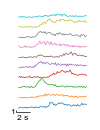

In [27]:
# Plot the corresponding dF/F traces

from os.path import join as pjoin
dfovf_dir = pjoin(dsconfig.db_dir, 'dfovf_long')
dfovf_dff = read_df(dfovf_dir, exp_name.replace('_Dp', ''))
plane = 1 # Plane number 2
trial = ('arg', 0)
cut_time = 2.6 + 5# seconds
totoal_time = 10
fig = plot_example_traces(dfovf_dff, plane, trial, roi_ids,
                          spacing=4.4,
                          cut_time=cut_time, total_time=total_time)
dataset_name = 'juvenile'
fig_name = f'{dataset_name}_dfovf_example_traces_per_neuron_{exp_name}_Arg'
save_figure_for_paper(fig, fig_name, paper_fig_dir)
plt.show()